In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_excel('entity_links.xlsx', sheetname='train')
data_eval = pd.read_excel('entity_links.xlsx', sheetname='eval')
data_items = pd.read_excel('entity_links.xlsx', sheetname='canonical_line_item_table')

#### Basic Data information

In [3]:
data_train.head()

,line_item_name,line_item_description,canonical_vendor_name,canonical_line_item_name
0,Management Services,April 2019 Services,10 Minute Ventures,Management Services
1,June Web Media Fee,"($249,300 x 12% Commission)",Acqcom Digital Marketing,Web Media Fee
2,June Web Media Fee,"($180,000 x 12% Commission)",Acqcom Digital Marketing,Web Media Fee
3,Business Package,NaN,Adjust,Business Package
4,SEO Services,NaN,AdLift,SEO Services


In [4]:
data_eval.head()

,line_item_name,line_item_description,canonical_vendor_name,canonical_line_item_name
0,Management Services,May 2019 Services,10 Minute Ventures,NaN
1,Acrobat Pro DC,NaN,Adobe,NaN
2,AIEX 96 Pieces Adhesive Poster Tacky Putty Sti...,NaN,Amazon Business,NaN
3,AmazonBasics AAA 1.5 Volt Performance Alkaline...,NaN,Amazon Business,NaN
4,AmazonBasics Mesh Trash Can Waste Basket,1,Amazon Business,NaN


In [5]:
data_items.head()

,canonical_vendor_name,canonical_line_item_name
0,10 Minute Ventures,Management Services
1,ACORD,eForms Redistribution
2,Acqcom Digital Marketing,Web Media Fee
3,CSC,DISBURSEMENT/COST - ANNUAL REPORT/TAX RETURN
4,CSC,FOREIGN FILING


In [6]:
unique_vendors = dict(data_items['canonical_vendor_name'].value_counts()).keys()
print(len(unique_vendors))
vendor_appearances = dict(data_items['canonical_vendor_name'].value_counts()).values()

132


#### Checking for duplicates

In [7]:
print(len(data_items.canonical_line_item_name.unique()),data_items.shape[0])
data_items[data_items.duplicated(['canonical_line_item_name'])]

536 545


,canonical_vendor_name,canonical_line_item_name
274,KPMG,Expenses
305,Miranda Eifler,Blog Post
344,Snowflake,Sales Tax
394,Power Digital Marketing,Marketing Services
479,Intrequant,Expenses
483,Appjobs,Hourly Services
499,Duff & Phelps,Expenses
502,Athorus,Hourly Services: BYH
528,Athorus,Filing Fees


#### Checking intersection between train table and item table

In [8]:
for i in unique_vendors:
    all_strings='\n'.join(data_items[data_items['canonical_vendor_name']==i]['canonical_line_item_name'])
    all_strings=all_strings.split('\n')
    for j in data_train[data_train['canonical_vendor_name']==i]['canonical_line_item_name']:
        if j:
            print(j in all_strings, "#"*3, i, "#"*3 ,j)
        else:
            print("not availabele")
    print("="*50)

True ### Amazon Business ### [100 Pack] 10 oz. White Paper Hot Cups - Coffee Cups
True ### Amazon Business ### 1 Kitchen Sink Strainer Basket Catcher (2-pack) - 4.5" Diameter, Wide Rim Perfect for Most Sink Drains, Anti-Clogging Micro-Perforation 2mm Holes, Rust
True ### Amazon Business ### 1 Prime-Line U 9940 Mailbox Lock - Replacement, Multipurpose Mailbox Lock for Several Brands - Brass Finish, ILCO 1003M Keyway, Opens Counter-Clockwise
True ### Amazon Business ### 100 PCS Binder Clips + 200PCS Bonus Paper Clips -6 Assorted Size Paper Clamps Clips with 28mm 32mm Paper Clips (300)
True ### Amazon Business ### 18 oz Party Cups, 96 Count - Black, Purple, Pumpkin Orange - 32 Each Color
True ### Amazon Business ### 4 Oz. White Paper Hot Coffee Cup For Espresso, Nespresso, Lavazza, Sampling Cup 100 Pack
True ### Amazon Business ### 8 AmazonBasics USB Type-C to USB 3.1 Gen1 Female Adapter Cable - White
True ### Amazon Business ### AboveTEK Sleek Magnetic Tablet Stand
True ### Amazon Busine

True ### Microsoft Azure ### Storage: General Block Blob Write Operations
True ### Microsoft Azure ### Storage: Premium Page Blob LRS Snapshots US East
True ### Microsoft Azure ### Storage: Premium SSD Managed Disks LRS Snapshots US East
True ### Microsoft Azure ### Storage: Premium SSD Managed Disks P10 Disks US East
True ### Microsoft Azure ### Storage: Premium SSD Managed Disks P10 Disks US East
True ### Microsoft Azure ### Storage: Premium SSD Managed Disks P10 Disks US East
True ### Microsoft Azure ### Storage: Premium SSD Managed Disks P30
True ### Microsoft Azure ### Storage: Standard HDD Managed Disks Disk Operations
True ### Microsoft Azure ### Storage: Standard HDD Managed Disks LRS Snapshots US East
True ### Microsoft Azure ### Storage: Standard Page Blob Disk Read Operations
True ### Microsoft Azure ### Storage: Standard Page Blob LRS Data Stored
True ### Microsoft Azure ### Storage: Standard SSD Managed Disks E10 Disks US East
True ### Microsoft Azure ### Storage: Tables B

True ### CSC ### SERVICE FEE - PREPARE & FILE ANNUAL REPORT/TAX RETURN - ANNUAL REPORT MONITORING SERVICE
True ### CSC ### SERVICE FEE - PREPARE & FILE ANNUAL REPORT/TAX RETURN - ANNUAL REPORT MONITORING SERVICE
True ### CSC ### SERVICE FEE - PREPARE & FILE ANNUAL REPORT/TAX RETURN - ANNUAL REPORT MONITORING SERVICE
True ### CSC ### SERVICE FEE - PREPARE & FILE ANNUAL REPORT/TAX RETURN - ANNUAL REPORT MONITORING SERVICE
True ### CSC ### SERVICE FEE - PREPARE & FILE ANNUAL REPORT/TAX RETURN - ANNUAL REPORT MONITORING SERVICE
True ### CSC ### SERVICE FEE - PREPARE & FILE ANNUAL REPORT/TAX RETURN - ANNUAL REPORT MONITORING SERVICE
True ### CSC ### SERVICE FEE - PREPARE & FILE ANNUAL REPORT/TAX RETURN - ANNUAL REPORT MONITORING SERVICE
True ### CSC ### SERVICE FEE - PREPARE & FILE ANNUAL REPORT/TAX RETURN - ANNUAL REPORT MONITORING SERVICE
True ### CSC ### SERVICE FEE - PREPARE & FILE ANNUAL REPORT/TAX RETURN - ANNUAL REPORT MONITORING SERVICE
True ### CSC ### SPECIAL ARRANGEMENT DISCOUNT


True ### Google ### G Suite Basic
True ### SendGrid ### Contact List Storage
True ### SendGrid ### Email Activity History - Pro 100K: 30 Days
True ### SendGrid ### Pro 100K
True ### SendGrid ### Pro 100K
True ### SendGrid ### Pro 100K
True ### SendGrid ### Pro 100K
True ### Wilson Stevens ### Book-keeping Services
True ### Wilson Stevens ### Book-keeping Services
True ### Wilson Stevens ### Service address charge
True ### Pingdom ### Pingdom Advanced
True ### Pingdom ### Pingdom Standard
True ### Marsh & McLennan ### CL Crime
True ### Snowflake ### Capacity Annual Purchase
True ### Barrett Associates ### Legislative Services in New York State
True ### KPMG ### Non-hourly services:  Audit of Verifly Holdings Limited
True ### KPMG ### Non-hourly services:  Audit of Verifly Holdings Limited
True ### KPMG ### Non-hourly services: Professional tax consulting
True ### KPMG ### Non-hourly services: Professional tax consulting
True ### KPMG ### Non-hourly services: Professional tax consulting


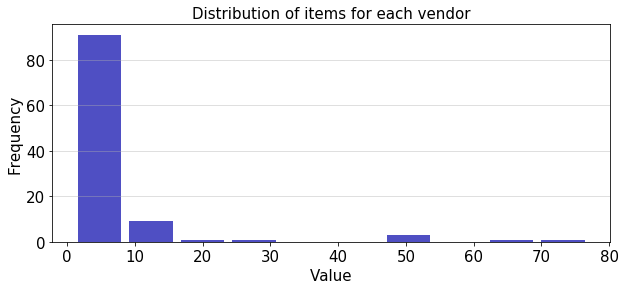

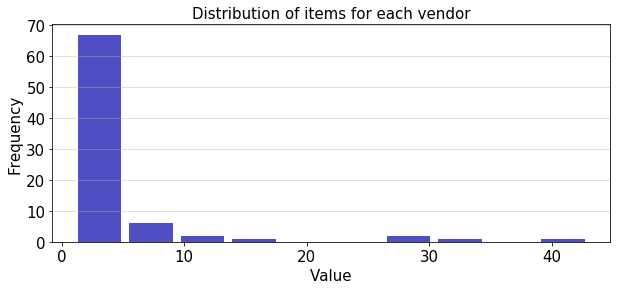

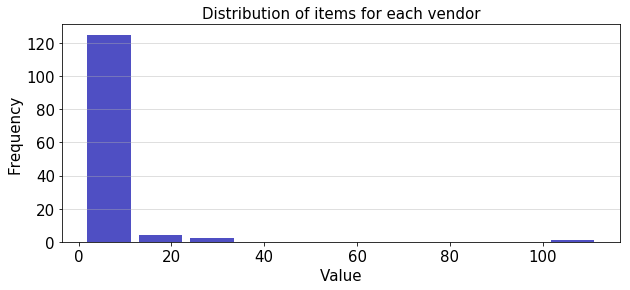

In [9]:
def histograms(data):
    plt.figure(figsize=[10,4])
    n, bins, patches = plt.hist(x=data, bins=10, color='#0504aa',alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.5)
    plt.xlabel('Value',fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.title('Distribution of items for each vendor',fontsize=15)
    plt.show()

vendor_appearances = dict(data_train['canonical_vendor_name'].value_counts()).values()
histograms(list(vendor_appearances))
vendor_appearances = dict(data_eval['canonical_vendor_name'].value_counts()).values()
histograms(list(vendor_appearances))
vendor_appearances = dict(data_items['canonical_vendor_name'].value_counts()).values()
histograms(list(vendor_appearances))

#### vendors that are present in train/eval data but not there in item table

In [10]:
print(set(dict(data_train['canonical_vendor_name'].value_counts()).keys()) - set(unique_vendors))
print(set(dict(data_eval['canonical_vendor_name'].value_counts()).keys()) - set(unique_vendors))

set()
set()


#### Investigating spacial characters and how to handle them

In [11]:
train_spl = []
item_spl = []
eval_spl = []
def get_spl(txt, res_spl):
    for i in str(txt): 
        if not i.isalpha(): 
            res_spl.append(i)
for i in list(data_items.columns):
    data_items[i].apply(lambda x: get_spl(x,item_spl))
item_spl = set(item_spl)

for i in list(data_train.columns):
    data_train[i].apply(lambda x: get_spl(x,train_spl))
train_spl = set(train_spl)

for i in list(data_eval.columns):
    data_eval[i].apply(lambda x: get_spl(x,eval_spl))
eval_spl = set(eval_spl)

spl_union=item_spl.union(train_spl, eval_spl)

print(item_spl, len(item_spl))
print('='*50)
print(train_spl, len(train_spl))
print('='*50)
print(eval_spl, len(eval_spl))
print('='*50)
print(spl_union, len(spl_union))

{'0', ';', '-', '1', '3', '5', '7', '$', '“', ':', '.', ' ', '9', '&', ')', '4', '[', '+', '|', "'", ',', '2', '6', '€', '/', '_', ']', '8', '%', '"', '('} 31
{'*', '?', '0', ';', '1', '-', '°', '3', '5', '7', '$', '{', '=', '”', '¦', '“', ':', '.', '¢', ' ', '9', '&', ')', '[', '4', '+', '|', '}', "'", ',', '#', '>', '@', '!', '2', '6', '€', '/', '™', '_', ']', '8', '%', '"', '('} 45
{'*', '?', '0', ';', '1', '-', '3', '5', '7', '$', '£', '=', '¦', '“', ':', '.', '9', ' ', '&', ')', '4', '+', '[', "'", ',', '>', '@', '2', '6', '€', '/', '_', '™', ']', '8', '%', '"', '('} 38
{'*', ';', '-', '1', '3', '7', '$', '{', '”', '¦', '“', ':', '.', '¢', '&', '|', ',', '>', '!', '2', '6', '_', ']', '%', '?', '0', '°', '5', '=', '£', ' ', '9', ')', '4', '[', '+', '}', "'", '#', '@', '€', '/', '™', '8', '"', '('} 46


In [12]:
# total 46 non alpha characters, out of them we have 10 digits

#### Understanding data more

In [13]:
import re

In [14]:
for i in spl_union:
    all_strings = []
    for k in data_items.columns:
        strings=('\n'.join(data_items[k])).split('\n')
        all_strings.extend(strings)
    for k in data_train.columns:
        data_train[k] = data_train[k].astype('str')
        strings=('\n'.join(data_train[k])).split('\n')
        all_strings.extend(strings)
    for k in data_eval.columns:
        data_eval[k] = data_eval[k].astype('str')
        strings=('\n'.join(data_eval[k])).split('\n')
        all_strings.extend(strings)

    for j in all_strings:
        if i in j and (not i ==' '):
            if i == '/':
                if (re.findall("(?<=\d)/(?=\D)", j)):
                    print(j)
            else:
                print(j)
    print("="*50, i, "="*50)
    # based on the results
    # & ===> replace with 'and'
    # - ===> remove/replace with space (problems wi-fi, 2-way, 2-pack)
    # " ===> remove (representing inches, as its uniform through all the data)
    # / ===> replace by space ?
    # , ===> remove
    # . ===> between two digits keep it, if not remove it , if its part of url remove the letter after .
    # [] ===> remove
    # () ===> remove
    # +, if its last element keep it, if not repalace it with and
    # ' ===> remove
    # numbers ===> keep them as is
    # % ===> percent
    # : ====> remove
    # single letters ===> keep it as is
    # € ==> remove
    # “ ===> remove
    # ; ===> remove
    # _ ==> keep as is
    # -> ==> replace it with to
    # @ ==> at
    # ' x ' ====> times
    # = ===> equals_to

*Marketing Services*
Capacity - Upfront Purchase - Service through 11/25/2020 *
*New - CL Crime
PAYPAL *DENNIS
*New - CL Cyber Liability
*Marketing Services*
Capacity Annual Purchase - Service through 3/18/2020 *
================================================== * ==================================================
Pilot G2 Retractable Premium Gel Ink Roller Ball Pens Fine Pt (.7) Dozen Box, Navy Blue; Retractable, Refillable & Premium Comfort Grip; Smooth Lines
Pilot G2 Retractable Premium Gel Ink Roller Ball Pens Fine Pt (.7) Dozen Box, Navy Blue; Retractable, Refillable & Premium Comfort Grip; Smooth Lines
Final billing for review of shareholder loan agreements including conference calls to discuss solutions to founderâ€™s ownership dilution in respect of IAC fundraising;
Final billing for preparation and review of Form W-8 including responding to IAC regarding completion of Form W-8;
Discounts / Credits Acct (e) Credit from previous month (as discussed - structured as retention cre

Mouthwash Refill of 6 Bottles & 720 Cups - Alcohol-Free - Six 1.5 Liter Mouthwash Bottles and a Box of 720 Cups.
NYHI 200-Pack 4oz White Paper Disposable Cups - Hot/Cold Beverage Drinking Cup for Water, Juice, Coffee or Tea - Ideal for Water Coolers, Party, or Co
NYHI 50-Pack 6oz White Paper Disposable Cups - Hot/Cold Beverage Drinking Cup for Water, Juice, Coffee or Tea - Ideal for Water Coolers, Party, or Cof
Post-it Tabs, 1 in. Solid, Aqua, Yellow, Pink, Red, Green, Orange, Durable, Writable, Repositionable, Sticks Securely, Removes Cleanly, 6/Color, 36/Di
Samsung 128GB 100MB/s (U3) MicroSDXC Evo Select Memory Card with Adapter (MB-ME128GA/AM)
Slipstick CB680 2 Inch Floor Protecting Rubber Office Chair Caster Wheels (Set of 5) Standard Stem Size - Black/Gray
USB C Charger, Nekteck 90W Type C Wall Charger USB-IF Certified with Power Delivery,Foldable Plug, Built-in 6ft Cable for MacBook Pro/Air 2018, Google
USB C Charger, Nekteck 90W Type C Wall Charger USB-IF Certified with Power De

Hourly Services: Product Design Director
Hourly Services: Product Design Senior Consultant
Hourly Services: Product Design Consultant
Hourly Services: Accredited Actuary
Hourly Services: Actuarial Consultant
Hourly Services: Non-Accredited Actuary
Hourly Services: Principal & Consulting Actuary
Consulting: Brand Development, Naming
Consulting: Brand Scope Expansion
Consulting: Content Production
Consulting: Launch Campaign & Digital Development
Thimble: PL / TM + Brand Pyramid
20L9001AUS: Lenovo ThinkPad T580 20L9
20QD000BUS: Lenovo ThinkPad X1 Carbon (7th Gen) 20QD
Barracuda Sentinel for Office 365 - subscription license (1 year): Billed Monthly
27MU88-W: LG ELECRONICS USA : LCD Display - 16 9 UHD
ankerUSB: Anker USB C Hub Adapter, 5-in-1 USB C Adapter
CRA-1yr-PLM: Cyber Risk Aware - 1-Year Subscription
EEPAC-Y1: ESET Endpoint Protection Advanced Cloud â€“ 1-Year Subscription License
jabra: Jabra Speak 710 MS Wireless Bluetooth Speaker for Softphones and Mobile Phones
Non-Billable Tim

Hourly Services: Yakey, C
15A Receptacle Duplex Circuit 1, 3-Circ
15A Receptacle Duplex Circuit 1, 3-Circ
15A Receptacle Duplex Circuit 1, 3-Circ
Power Entry, 72" 3-Circ
Standard Users, Internal Use
Filing Fee, WIPO
Consulting: Brand Development, Naming
Staples Carder Mesh Back Fabric Computer and Desk Chair, Black (24115-CC)
ankerUSB: Anker USB C Hub Adapter, 5-in-1 USB C Adapter
AIEX 96 Pieces Adhesive Poster Tacky Putty Sticky Non-Toxic Mounting Putty Reusable & Removable Wall Safe Tack Putty for Hanging Pictures and Museum,
AmazonFresh Mediterranean Extra Virgin Olive Oil, 68 Fl Oz (2L)
Apple iPad 2 MC979LL/A 2nd Generation Tablet (16GB, Wifi, White) (Renewed)
Apple iPad with Retina Display MD511LL/A (32GB, Wi-Fi, Black) 4th Generation (Renewed)
Bose QuietComfort 35 (Series I) Wireless Headphones, Noise Cancelling - Black
Calculator,Vilcome 12-Digit Solar Battery Office Calculator with Large LCD Display Big Sensitive Button, Dual Power Desktop Calculators (Black)
Mrs. Meyer's Clean

1,500-2,000 words
900-1,500 words
900-1,500 words
900-1,500 words
900-1,500 words
900-1,500 words
900-1,500 words
900-1,500 words
900-1,500 words
239040343US-VF_Discovery
2019 Marketing Placements
Storage: Premium SSD Managed Disks P10 Disks US East
Storage: Premium SSD Managed Disks P10 Disks US East
Storage: Premium SSD Managed Disks P10 Disks US East
Storage: Premium SSD Managed Disks P30
Storage: Standard SSD Managed Disks E10 Disks US East
Storage charge (60 GB)
Reply. 3000 contacts
Email Activity History - Pro 100K: 30 Days
Pro 100K
Pro 100K
Pro 100K
Pro 100K
20QD000BUS: Lenovo ThinkPad X1 Carbon (7th Gen) 20QD
20QD000BUS: Lenovo ThinkPad X1 Carbon (7th Gen) 20QD
Acer SB220Q bi 21.5 inch Full HD
Logitech MK270 Wireless Keyboard and Mouse Combo
Scotch 12" x 60' Cushion
Assurant B2B 4YR Kitchen Protection Plan with Accidental Damage $50-74
Dell 130-WATT 3-Prong AC Adapter with 6 FT Power Cord
Logitech K400 Plus Wireless Touch TV Keyboard with Easy Media Control and Built-In Touchpa

Credit note (Facebook adjustments Jan/Feb 2019)
Tudor Bay ($155K), UX/UI Designer As per agreement: Verifly sourced candidate at 10%
Richard Loeffler ($140K), Technical Project Manager
1 additional seat ($9/month each - prorated for 27 days)
Monthly Management Fees FB/IG: $112,033.64 Google: $153,849.28 Linkedin:$ Bing: $7,001.11 Total Spend: $272,884.03 Comment: Management Fee: 11% - per new terms (Media Spend up to $300,000 per month: 11% of Media Spend)
12% Media management fee per agreement (12% for spend below $200k total)
Monthly Management Fees FB/IG: $110,959.85 Google: $242,619.73 Bing: $7,182.11 Linkedin: $3,297.23 Total Spend: $364,058.92 Comment: Management Fee: 10% - per new terms (Media Spend above $300,000 per month: 10% of Media Spend)
PROJECT: Verifly; TASK: CFO Advisory (ad hoc); PERSON: Donny Tyra
PROJECT: Verifly; TASK: CFO Advisory (ad hoc)
TASK: CFO Advisory (ad hoc); PERSON: Jason Lazarus, Heather Fipps
Content Project (Payment 3 of 3)
Verifly_CPC - SmallBusiness

In [15]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [16]:
def replace_persons_cities(txt):
    sents = nlp(txt) 
    for ee in sents.ents:
        st = str(ee)
        le = len(st)
        if ee.label_=="PERSON" or ee.label_ == "GPE":
            txt = txt[:txt.find(st)]+ " "+ee.label_+ " "+txt[txt.find(st)+le:]
    return txt

In [17]:
import re
def preprocessing(text, replace=True):
    text=re.sub("@"," at ",text) # 1
    text=re.sub("%"," percent ",text) # 2
    text= " ".join([i[0]+"_and_"+i[2] if (('&' in i ) and (len(i)==3)) else i for i in text.split()]) # 3
    text=re.sub("&"," and ",text) # 3
    text=re.sub("\$","",text) # 4
    text=re.sub("->"," to ",text) # 5
    text=re.sub("-", " ", text) # 6
    text=re.sub(",", " ", text) # 7
    text=re.sub("(?<=\D)/(?=\D)", " ", text) # 8
    text=re.sub("(?<=\d)/(?=\D)", " per ", text) # 8
    text=re.sub('"', "", text) # 9
    text= " ".join([i[0]+"_and_"+i[2] if (('.' in i ) and (len(i)==3)) else i for i in text.split()]) #10
    text=re.sub("(?<=\D)\.(?=\D)", " ", text) # 10
    text=re.sub("(?<=\d)\.(?=\D)", " ", text) # 10
    text=re.sub('\+', " sum ", text) # 11
    text=re.sub(':', " ", text) # 12
    text=re.sub(';', " ", text) # 13
    text=re.sub('\|', " ", text) # 14
    text=re.sub('\*', "", text) # 15
    text=re.sub('#', "", text) # 16
    text=re.sub(' x ', " times ", text) # 17
    text=re.sub("(?<=\d)x(?=\d)", " times ", text) # 10
    text=re.sub('=', " equals_to ", text) # 18
    text=text.replace("'", '').replace('[','').replace(']','').replace('{','').replace('}','').replace('(','').replace(')','')
    # 18-25
    text= "".join(filter(lambda x: ord(x)<128, text))# 25-33
    text=re.sub("\?","",text) # 34
    text=re.sub("\!","",text) # 34
    text = re.sub('\d{1}/\d{1}/\d{4}', " date_string " ,text)
    text = re.sub('\d{1}/\d{1}/\d{2}', " date_string " ,text)
    text = re.sub('\d{2}/\d{2}/\d{4}', " date_string " ,text)
    text = re.sub('\d{2}/\d{2}/\d{2}', " date_string " ,text)
    text = re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}/\d{1,2}"," ip_address ",text)
    text = re.sub('/', ' ', text)
    if replace:
        text = replace_persons_cities(text)
    text = re.sub(' +', ' ', text)
    text = text.lower()
    text = text.strip()
    if text.endswith("."):
        text= text[:-1]
    return text

#### Data Cleaning

In [18]:
text =" hello  a&t how a.e you"
preprocessing(text)

'hello a_and_t how a_and_e you'

In [19]:
a = str("internet access new york chinatown les stealth fiber 161 bowery fl 2 206.252.208.100/30")
print(a)
re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}/\d{1,2}","ipaddress",a)

internet access new york chinatown les stealth fiber 161 bowery fl 2 206.252.208.100/30


'internet access new york chinatown les stealth fiber 161 bowery fl 2 ipaddress'

In [20]:
preprocessing(' 206.252.208.100/30 !oz?. $Isaacâ€™s+ [trip] {for;} 1/22 a/b *visa. 12" interview\'.  | (round”-trip flight and one night hotel) hello. how are you. 12.34 P.C 2. hello')

'ip_address oz isaacs sum trip for 1 22 a b visa 12 interview round trip flight and one night hotel hello how are you 12.34 p_and_c 2 hello'

In [21]:
datap_train=pd.DataFrame()
for i in data_train.columns:
    if not i in ['canonical_vendor_name','canonical_line_item_name']:
        datap_train[i]=data_train[i].apply(preprocessing, replace=False)
    else:
        datap_train[i]=data_train[i].apply(preprocessing, replace=True)
        
datap_eval=pd.DataFrame()
for i in data_eval.columns:
    if not i in ['canonical_vendor_name','canonical_line_item_name']:
        datap_eval[i]=data_eval[i].apply(preprocessing, replace=False)
    else:
        datap_eval[i]=data_eval[i].apply(preprocessing, replace=True)

datap_items=pd.DataFrame()
for i in data_items.columns:
    datap_items[i]=data_items[i].apply(preprocessing, replace=False)

In [22]:
datap_train.head()

,line_item_name,line_item_description,canonical_vendor_name,canonical_line_item_name
0,management services,april 2019 services,10 minute ventures,management services
1,june web media fee,249 300 times 12 percent commission,acqcom digital marketing,web media fee
2,june web media fee,180 000 times 12 percent commission,acqcom digital marketing,web media fee
3,business package,nan,adjust,business package
4,seo services,nan,adlift,seo services


#### Understanding the words with digits and their length

In [23]:
def dist_number_words(df):
    all_strings = []
    for k in df.columns:
        strings=('\n'.join(df[k])).split('\n')
        all_strings.extend(strings)

    numbers = []
    for j in all_strings:
        if re.findall("\S*\d\S*", j):
            numbers.extend("\n".join(re.findall("\S*\d\S*", j)).split('\n'))
    print("="*50)
    print(set(numbers))
    numbers_len_dist=[]
    for i in numbers:
        numbers_len_dist.append(len(i))
    import seaborn as sns
    import matplotlib.pyplot as plt
    if len(numbers_len_dist):
        sns.kdeplot(numbers_len_dist)
        plt.show()

{'250.00', '215', '68.368', '74', '550', '1080p', '2020', '001', '4_and_7', '600.00', '249', '2193820150728468', '13th', '7716401', '3', 'gen1', '3ft', '27mu88', '880', '60.891', '161', '144.495', '85', '75', '0gb', '0.30', 'ac404', 's2718d', '55', 'i7', '350', '21', '10', '25k', '140k', 'nh4arm', '20.46', '58', '300', '125', '90w', '5s', '12.8', '0.00', '16.386', '1080', '128gb', '4099501', '205', '2000433', 'modena250ml', '10000', '11', '432.00', '0.020000', '4th', '232', '65', '2160', '1920', '3840', '1b', '24', '105', 'i5', '1000', 'nh410s', '620', '1yr', '1099', '43647', '5.50', '48', '2.00', '0.001', '15a', '139', '65.00', '272', '1096', '43.8', 'b88650', '800.00', '95', '2019dec', '31', '164.0001', '15', '28lb', '4k', '01', '133.429', '103672', '32.20', '5', '200', '2_and_0', '0.026000', '0.010000', '180', '4102460', '16gb', '6s', '1.29', 'm525', '72', 'b00dh4daia', '96', '100mb', 'e3', '72175misc1', '240', 'ptd210', '5.397', 'b000bpgp6m', 'ct1', '38', '9', '2017', '0.000182', '

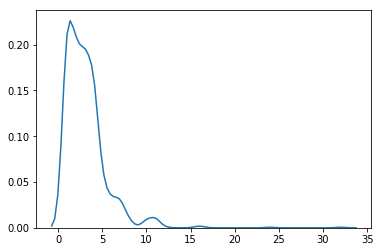

In [24]:
dist_number_words(datap_train)

{'130eb', '4.00', 'muqw2ll', '250.00', '8650u', '74', '35', 'da130pm130', '1.00', 's2', 'ru00113', '2020', '001', '13.3', '37058815', '1tb', '85k', '3', '85', '9530', '350', '55', '23', 'i7', '2019oct', '10', 's3', '4096986', '125', '0.00', '36.18', '1080', '16419693', '43862', '205', '61.18', 'b01n3lcedl', '11', '4th', '710', '65', '2160', '3840', '1920', '13.75', '106969', '105', '620', '12inch', '15.6', '251250095us', '48', '4106986', '76.18', 'm3800', '95', 'md513ll', '31', '115lbs', '164.0001', '15', '8.75', '01', '80', '64gb', '2_and_0', '5', '200', '194.18', 'mc979ll', '17436', '16gb', '193', '32gb', '96', 'e3', '1818867568223733', '240', '78610', '105199', '3m9pc46n', '130', 'cat6', '9', '20l9001aus', '6tty6', '002', '18', '425', 'ds1', 'ddr4', '250', '231.18', '43466', 'e2s', '156.18', '115', '2nd', '90', '8', '00', '43952', '81.18', '0', '900', '365', 'e2', '86.18', '56.18', '5pcs', '2019', '26', '36', '019', '7624', '216.18', '55.781', '43678', 'ha130pm130', 'x2', '1', '1_an

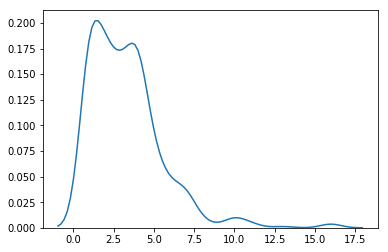

In [25]:
dist_number_words(datap_eval)

{'130eb', '35', '74', 'da130pm130', '1080p', '13.3', '1tb', '7716401', '3', 'gen1', '3ft', '27mu88', '9530', '75', '256gb', '3rd', '21', '55', '23', '25k', 'i7', '10', 's2718d', 'ac404', 's3', '8gb', '58', '300', '90w', '5s', '128gb', 'modena250ml', '802.3af', '11', '4th', '710', '2160', '3840', '3_and_0', '24', '1000', '1yr', '12inch', '15.6', '251250095us', '48', '15a', '43.8', 'm3800', '115lbs', '8.75', '80', '28lb', '15', '64gb', '2_and_0', '5', '200', '17436', '16gb', '6s', '32gb', '4s', '1.18', '96', '100mb', 'm525', '72', 'e3', 'ptd210', '100ct', '130', '802.11ac', '38', 'cat6', '2017', '9', '6tty6', '18', '20l9001aus', '7th', 'ds1', '8_and_5', '250', '6oz', 'cp960', '0.03', '9.7in', 'v000k', '3_and_1', '.7', 'me128ga', '4_and_5', '2nd', 'c920', '8', 's10', '0', 'sb220q', '900', '20qd', '365', '13', '8pin', '5pcs', '2019', '3.3ft', '36', '14', 'ha130pm130', '48count', '286291426us', '1', '21.5', '2m', '1.6ghz', '3000', 'u3', '7', '100ml', 'g2', '3.5oz', '87w', '24115', '99.99', 

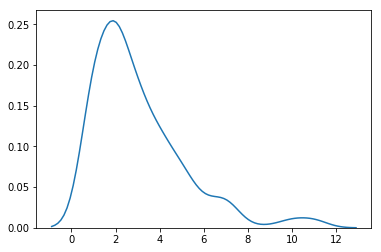

In [26]:
dist_number_words(datap_items)

#### Removing words with digits inbetween like a2b3 etc

In [27]:
def remove_more_than_6(text):
    string = ""
    for word in text.split():
        if re.search('\d',word) and len(word)>6:
            pass
        elif re.search('(\d+)(\D+)',word) and re.search('(\D+)(\d+)',word):
            pass
        else:
            string +=word+" "
    return string.strip()

In [28]:
for i in datap_items.columns:
    datap_items[i]=datap_items[i].apply(remove_more_than_6)
for i in datap_train.columns:
    datap_train[i]=datap_train[i].apply(remove_more_than_6)
for i in datap_eval.columns:
    datap_eval[i]=datap_eval[i].apply(remove_more_than_6)

In [88]:
#we will be keeping the words like <digits><text> or <text><digits>

{'215', '74', '550', '1080p', '2020', '001', '249', '13th', '3', 'gen1', '3ft', '880', '161', '85', '75', '0gb', 'ac404', '350', '55', 'i7', '21', '25k', '10', '140k', '58', '300', '125', '90w', '5s', '1080', '128gb', '205', '10000', '11', '4th', '232', '65', '2160', '1920', '3840', '1b', '24', '105', 'i5', '1000', '620', '1yr', '43647', '1099', '48', '15a', '139', '272', '1096', 'b88650', '95', '31', '15', '28lb', '4k', '01', '103672', '5', '200', '180', '16gb', '6s', 'm525', '72', '96', '100mb', 'e3', '240', 'ptd210', 'ct1', '38', '9', '2017', '160', '18', '7th', '133', '10gb', '250', '6oz', '43466', '.7', '28', 'c920', '8', 'x4', '00', '0', '900', '20qd', '365', '13', '8pin', '2019', '019', '7624', '36', '14', '43617', '112', '2010', '1', '919', '2m', '3000', 'u3', '102197', '7', 'g2', '25', '13inch', '84723', '24115', '33588', '700', '12', '30th', '2mm', '153', '22', '165', '242', 'x1', '364', '100k', '27', '39', 'e10', '2', '6', '500', '000', '155k', '200k', 'p10', '200pcs', '950'

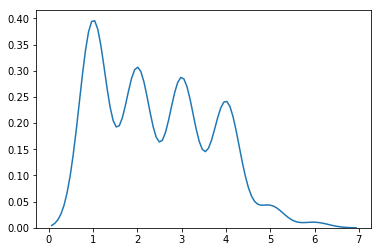

In [29]:
dist_number_words(datap_train)

In [30]:
datap_train.head()

,line_item_name,line_item_description,canonical_vendor_name,canonical_line_item_name
0,management services,april 2019 services,10 minute ventures,management services
1,june web media fee,249 300 times 12 percent commission,acqcom digital marketing,web media fee
2,june web media fee,180 000 times 12 percent commission,acqcom digital marketing,web media fee
3,business package,nan,adjust,business package
4,seo services,nan,adlift,seo services


In [31]:
datap_items.shape, data_items.shape, \
datap_items['canonical_line_item_name'].unique().shape, \
data_items['canonical_line_item_name'].unique().shape,\
data_items['canonical_vendor_name'].unique().shape,\
datap_items['canonical_vendor_name'].unique().shape,

((545, 2), (545, 2), (535,), (536,), (132,), (132,))

In [32]:
data_items[data_items['canonical_line_item_name'].duplicated()]

,canonical_vendor_name,canonical_line_item_name
274,KPMG,Expenses
305,Miranda Eifler,Blog Post
344,Snowflake,Sales Tax
394,Power Digital Marketing,Marketing Services
479,Intrequant,Expenses
483,Appjobs,Hourly Services
499,Duff & Phelps,Expenses
502,Athorus,Hourly Services: BYH
528,Athorus,Filing Fees


In [33]:
datap_items[datap_items['canonical_line_item_name'].duplicated()]

,canonical_vendor_name,canonical_line_item_name
164,classpass,sales tax
274,kpmg,expenses
305,miranda eifler,blog post
344,snowflake,sales tax
394,power digital marketing,marketing services
479,intrequant,expenses
483,appjobs,hourly services
499,duff and phelps,expenses
502,athorus,hourly services byh
528,athorus,filing fees


#### Looking for the words that formed after concatination of two or more words 

> distribution of word lengths so that we can find a threshold to remove not so usefull words

In [34]:
import collections
def dist_words_len(df):
    all_strings = {}
    for k in df.columns:
        for sentance in df[k].values:
            for word in sentance.split():
                if all_strings.get(len(word), -1) ==-1:
                    all_strings[len(word)]=1
                else:
                    all_strings[len(word)]+=1
                if len(word) > 10:
                    print(word, len(word))
        
    import seaborn as sns
    import matplotlib.pyplot as plt
    import collections

    all_strings = collections.OrderedDict(sorted(all_strings.items()))
    plt.bar(range(len(all_strings)), list(all_strings.values()), align='center')
    plt.xticks(range(len(all_strings)), list(all_strings.keys()))
    plt.show()

corporation 11
corporation 11
corporation 11
corporation 11
trustedchoice 13
corporation 11
homeadvisor 11
launchsquad 11
launchsquad 11
launchsquad 11
launchsquad 11
competitive 11
intelligence 12
communications 14
williamsburg 12
williamsburg 12
williamsburg 12
williamsburg 12
redistribution 14
disbursement 12
arrangement 11
representation 14
publication 11
representation 14
rechargeable 12
amazonfresh 11
mediterranean 13
rechargable 11
rechargable 11
thunderbolt 11
thunderbolt 11
quietcomfort 12
calculators 11
workstation 11
perforation 11
replacement 11
multipurpose 12
bloomingoods 12
amazonbasics 12
furnishings 11
amazonbasics 12
performance 11
amazonbasics 12
amazonbasics 12
amazonbasics 12
multipurpose 12
highlighter 11
heavyweight 11
transparent 11
gotfreshbreath 14
decorations 11
retractable 11
retractable 11
repositionable 14
simplehouseware 15
squaretrade 11
entrepreneurs 13
professional 12
elasticsearch 13
notification 12
amazoncloudwatch 16
modsecurity 11
professional 12
r

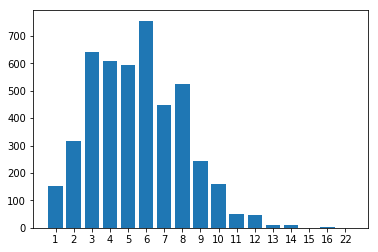

In [35]:
dist_words_len(datap_items)

In [36]:
s="This must not b3 delet3d, but the number at the end yes 134411"
s = re.sub(r"\d", "#", s)
s
def preprocessing_digits(text):
    text=re.sub(r"\d", "#", text)
    text= " ".join([i for i in text.split() if len(i)>1]) #10
    return text

for i in datap_train.columns:
        datap_train[i]=datap_train[i].apply(preprocessing_digits)
        
for i in datap_eval.columns:
    datap_eval[i]=datap_eval[i].apply(preprocessing_digits)

for i in data_items.columns:
    datap_items[i]=datap_items[i].apply(preprocessing_digits)

> as i will be planning for using glove vectors, i am replacing the digits with '#' so that we can get the vectors in glove vocabulary

> remove the single letter words also

In [37]:
dist_number_words(datap_items)

set()


In [38]:
all_strings = []
for k in datap_items.columns:
    strings=('\n'.join(datap_items[k])).split('\n')
    all_strings.extend(strings)
for k in datap_train.columns:
    strings=('\n'.join(datap_train[k])).split('\n')
    all_strings.extend(strings)
for k in data_eval.columns:
    strings=('\n'.join(datap_eval[k])).split('\n')
    all_strings.extend(strings)

for j in all_strings:
    for k in j.split():
        if(len(k)<3):
            print(k)
print("="*50, i, "="*50)

##
ct
co
co
co
co
ct
ct
ct
ct
in
it
in
it
in
it
in
it
jw
ko
ko
db
db
db
db
db
uk
ly
no
up
wi
fi
no
to
##
if
in
#x
co
##
##
##
fl
oz
#l
us
to
ho
##
##
##
ac
ft
of
aa
no
no
##
by
##
u#
mb
am
##
wi
fi
##
to
#s
##
oz
##
##
on
##
to
or
##
##
by
to
##
##
##
##
##
##
##
##
of
or
##
by
##
##
##
of
##
##
#m
##
or
of
##
is
or
##
##
##
tv
pc
##
##
##
oz
##
##
be
aa
tv
in
of
ge
ul
oz
to
##
##
##
##
xs
xs
xr
##
to
se
#s
#s
#s
to
to
to
tv
in
or
re
##
oz
of
of
of
##
oz
##
ac
##
ba
or
or
co
##
or
or
##
g#
pt
.#
it
##
di
##
##
##
##
to
##
of
no
to
tv
##
##
up
to
by
##
##
##
hd
up
to
at
##
hz
up
to
##
on
pc
su
or
ca
do
is
to
ip
wi
fi
##
by
lo
uk
uk
##
##
##
##
##
to
##
##
up
to
##
##
##
dg
##
to
##
##
##
of
of
of
of
vp
at
ev
wi
gb
##
gb
ms
ac
us
##
ds
of
bi
cl
cl
cl
re
in
vm
to
e#
to
pl
tm
on
x#
bi
hd
in
lg
##
in
y#
ms
##
##
ch
gu
##
in
ip
ip
lm
km
cc
sr
to
to
on
qa
pm
pm
dc
i#
##
hd
in
##
x#
##
ip
wi
fi
sg
sg
qc
id
s#
us
us
us
us
us
us
eb
wp
fd
jk
##
##
cc
##
##
##
oz
##
##
to
##
##
##
##
##
##
of
or
#

In [39]:
datap_items.head()

,canonical_vendor_name,canonical_line_item_name
0,## minute ventures,management services
1,acord,eforms redistribution
2,acqcom digital marketing,web media fee
3,csc,disbursement cost annual report tax return
4,csc,foreign filing


# Preprocessing completed

# data preparation

In [40]:
datap_train.head(10)

,line_item_name,line_item_description,canonical_vendor_name,canonical_line_item_name
0,management services,april #### services,## minute ventures,management services
1,june web media fee,### ### times ## percent commission,acqcom digital marketing,web media fee
2,june web media fee,### ### times ## percent commission,acqcom digital marketing,web media fee
3,business package,nan,adjust,business package
4,seo services,nan,adlift,seo services
5,creative cloud all apps,nan,adobe,creative cloud all apps
6,youtube integration ## percent final,nan,person,youtube integration
7,### pack ## o_and_ white paper hot cups coffee...,nan,amazon business,### pack ## o_and_ white paper hot cups coffee...
8,kitchen sink strainer basket catcher pack diam...,nan,amazon business,kitchen sink strainer basket catcher pack diam...
9,prime line #### mailbox lock replacement multi...,,amazon business,prime line #### mailbox lock replacement multi...


In [41]:
datapd_train= datap_train.drop_duplicates()
datapd_train = datapd_train.replace('nan', "")
datapd_train.shape, datap_train.shape

((622, 4), (659, 4))

#### Posing linking problem as binary classification

In [42]:
print(datapd_train.shape, datap_items.shape, datap_train.shape[0]*datap_items.shape[0], )
train=pd.merge(datapd_train, datap_items, on='canonical_vendor_name')
print(train.shape)

(622, 4) (545, 2) 359155
(12089, 5)


In [43]:
train.head(10)

,line_item_name,line_item_description,canonical_vendor_name,canonical_line_item_name_x,canonical_line_item_name_y
0,management services,april #### services,## minute ventures,management services,management services
1,june web media fee,### ### times ## percent commission,acqcom digital marketing,web media fee,web media fee
2,business package,,adjust,business package,additional attributions
3,business package,,adjust,business package,business package
4,seo services,,adlift,seo services,content marketing
5,seo services,,adlift,seo services,seo services
6,creative cloud all apps,,adobe,creative cloud all apps,acrobat pro dc
7,creative cloud all apps,,adobe,creative cloud all apps,creative cloud all apps
8,### pack ## o_and_ white paper hot cups coffee...,,amazon business,### pack ## o_and_ white paper hot cups coffee...,anti theft adjustable tablet security stand
9,### pack ## o_and_ white paper hot cups coffee...,,amazon business,### pack ## o_and_ white paper hot cups coffee...,apple ipad


#### Creating output values for the binary classification

In [44]:
Y=(train.canonical_line_item_name_x==train.canonical_line_item_name_y).values
Y.dtype=np.int8

In [45]:
all_strings = []
for k in datap_items.columns:
    strings=('\n'.join(datap_items[k])).split('\n')
    all_strings.extend(strings)
for k in datap_train.columns:
    strings=('\n'.join(datap_train[k])).split('\n')
    all_strings.extend(strings)
for k in data_eval.columns:
    strings=('\n'.join(datap_eval[k])).split('\n')
    all_strings.extend(strings)
all_words =set()
for i in all_strings:
    [all_words.add(word) for word in i.split()]
len(all_words)
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(vocabulary=list(all_words))
vect.fit(train['line_item_name'].values)
train_iterm_names = vect.transform(train['line_item_name'].values)
train_iterm_description = vect.transform(train['line_item_description'].values)

In [46]:
train_iterm_names.shape, train_iterm_description.shape

((12089, 2519), (12089, 2519))

In [47]:
# !pip install Distance
import distance

In [48]:
# !pip install fuzzywuzzy
# !pip install python-Levenshtein
from fuzzywuzzy import fuzz

In [49]:
def get_token_features(q1, q2):
    SAFE_DIV = 0.0001 
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens])
    q2_words = set([word for word in q2_tokens])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens])
    q2_stops = set([word for word in q2_tokens])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df, f1, f2):
    
    token_features = df.apply(lambda x: get_token_features(x[f1], x[f2]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset
    
    # http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy
    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x[f1], x[f2]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x[f1], x[f2]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x[f1], x[f2]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x[f1], x[f2]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x[f1], x[f2]), axis=1)
    
    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row[f1].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row[f2].split(" ")))    
        return 1.0 * len(w1 & w2)
    df['word_Common'] = df.apply(normalized_word_Common, axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row[f1].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row[f2].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    df['word_Total'] = df.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row[f1].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row[f2].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w2))
    df['word_share'] = df.apply(normalized_word_share, axis=1)
    
    return df

# ML model: 1 (Only item name)

In [50]:
with_featres=extract_features(train.drop(['canonical_line_item_name_x'], axis=1), "line_item_name", "canonical_line_item_name_y")

fuzzy features..


In [51]:
with_featres.head(5)

,line_item_name,line_item_description,canonical_vendor_name,canonical_line_item_name_y,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,...,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,word_Common,word_Total,word_share
0,management services,april #### services,## minute ventures,management services,0.999950,0.999950,0.999950,0.999950,0.999950,0.999950,...,0.0,2.0,100,100,100,100,0.950000,2.0,4.0,1.0
1,june web media fee,### ### times ## percent commission,acqcom digital marketing,web media fee,0.999967,0.749981,0.999967,0.749981,0.999967,0.749981,...,1.0,3.5,100,84,84,100,0.928571,3.0,7.0,1.0
2,business package,,adjust,additional attributions,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,2.0,26,26,26,31,0.117647,0.0,4.0,0.0
3,business package,,adjust,business package,0.999950,0.999950,0.999950,0.999950,0.999950,0.999950,...,0.0,2.0,100,100,100,100,0.941176,2.0,4.0,1.0
4,seo services,,adlift,content marketing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,2.0,28,28,28,33,0.076923,0.0,4.0,0.0


In [52]:
X_train = with_featres.drop(['line_item_name','line_item_description','canonical_vendor_name','canonical_line_item_name_y'], axis=1)
Y_train = Y

In [53]:
def cross_val_check(clf, X, Y, param):
    skf = StratifiedKFold(n_splits=4)
    scores_f1=cross_val_score(clf, X,Y, cv=skf, scoring='f1')
    scores_auc=cross_val_score(clf, X,Y, cv=skf, scoring='roc_auc')
    print(param,"F1 Score: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2), scores_f1)
    print(param,"AUC Score: %0.2f (+/- %0.2f)" % (scores_auc.mean(), scores_auc.std() * 2), scores_auc)
    print("="*50)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [55]:
for i in range(1, 17, 2):
    clf = DecisionTreeClassifier(max_depth=i, class_weight='balanced')
    cross_val_check(clf, X_train, Y_train, i)

clf = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
clf.fit(X_train, Y_train)
y_pred_train = clf.predict(X_train)
print("Confusion matrix \n", confusion_matrix(Y_train, y_pred_train))

1 F1 Score: 0.53 (+/- 0.56) [0.86166008 0.73170732 0.33723653 0.17275156]
1 AUC Score: 0.82 (+/- 0.16) [0.94645044 0.8083667  0.75718974 0.74801362]
3 F1 Score: 0.57 (+/- 0.54) [0.89711934 0.71090047 0.48739496 0.17782427]
3 AUC Score: 0.84 (+/- 0.17) [0.98464154 0.81987202 0.78614812 0.78006147]
5 F1 Score: 0.42 (+/- 0.47) [0.6744186  0.63374486 0.18518519 0.17751479]
5 AUC Score: 0.81 (+/- 0.19) [0.95971288 0.81618832 0.69701528 0.7852637 ]
7 F1 Score: 0.36 (+/- 0.50) [0.56164384 0.65800866 0.10325477 0.11778846]
7 AUC Score: 0.76 (+/- 0.19) [0.8484445  0.80858314 0.60085294 0.78019361]
9 F1 Score: 0.42 (+/- 0.58) [0.73059361 0.67873303 0.11139241 0.14953271]
9 AUC Score: 0.75 (+/- 0.18) [0.84239852 0.80107335 0.6000923  0.74210043]
11 F1 Score: 0.43 (+/- 0.53) [0.7254902  0.66063348 0.13666667 0.19280206]
11 AUC Score: 0.73 (+/- 0.16) [0.81344015 0.79064595 0.6055934  0.72183873]
13 F1 Score: 0.42 (+/- 0.50) [0.69856459 0.64220183 0.15619048 0.19628647]
13 AUC Score: 0.74 (+/- 0.16)

In [56]:
for i in range(Y_train.shape[0]):
    if y_pred_train[i]==0 and Y_train[i]==1:
        predictions = with_featres[['line_item_name','line_item_description','canonical_vendor_name','canonical_line_item_name_y']].iloc[i].values
        print("text:", predictions[0])
        print("description: ",predictions[1])
        print("vendor: ",predictions[2])
        print("output: ",predictions[3])
        print("="*50)

text: 
description:  shipping and handling
vendor:  amazon business
output:  shipping and handling
text: 
description:  super pumped the battle for uber
vendor:  amazon business
output:  super pumped the battle for uber
text: 
description:  xbox wireless controller white
vendor:  amazon business
output:  xbox wireless controller white
text: final billing for review of shareholder loan agreements including conference calls to discuss solutions to founders ownership dilution in respect of iac fundraising
description:  director hours
vendor:  andersen tax
output:  hourly services legal services
text: final billing for preparation and review of form including responding to iac regarding completion of form
description:  director hours
vendor:  andersen tax
output:  hourly services legal services
text: review of various state income tax notices
description:  associate hours
vendor:  andersen tax
output:  hourly services tax services
text: ac sum ipad ipad air ipad mini phx
description:  
ven

text: accounting core_accounting_service
description:  continued onboarding of dynamics and go live
vendor:  graphite financial
output:  hourly services other
text: accounting core_accounting_service
description:  preparation and filing
vendor:  graphite financial
output:  hourly services other
text: accounting core_accounting_service
description:  client and team communication
vendor:  graphite financial
output:  hourly services other
text: accounting core_accounting_service
description:  project verifly task client meetings external person donny tyra
vendor:  graphite financial
output:  hourly services projects
text: accounting core_accounting_service
description:  project verifly task cfo advisory ad hoc person donny tyra
vendor:  graphite financial
output:  hourly services projects
text: accounting core_accounting_service
description:  project verifly task financial package preparation person donny tyra
vendor:  graphite financial
output:  hourly services projects
text: accounting 

text: general
description:  officer resolution correspondence
vendor:  westmont associates
output:  hourly services lm
text: general
description:  producer onboarding correspondence
vendor:  westmont associates
output:  hourly services lm
text: general
description:  entity name search department of insurance and secretary of state
vendor:  westmont associates
output:  hourly services lm
text: general
description:  contact information correspondence and secretary of state question
vendor:  westmont associates
output:  hourly services lm
text: general
description:  background question guidance for new dp
vendor:  westmont associates
output:  hourly services lm
text: general
description:  referral call and correspondence
vendor:  westmont associates
output:  hourly services lm
text: general
description:  review proposed referral program and follow up with marro re potential issues and state requirements research earlier draft agreements pull final versions from folder and forward to clien

In [57]:
# the points are getting missclassified  as the number of common words are less

In [58]:
for fea, imp  in zip(np.array(X_train.columns)[np.argsort(clf.feature_importances_)], np.sort(clf.feature_importances_)):
    print(fea, imp)

cwc_min 0.0
word_Common 0.0
fuzz_ratio 0.0
token_sort_ratio 0.0
mean_len 0.0
first_word_eq 0.0
abs_len_diff 0.0
ctc_max 0.0
ctc_min 0.0
csc_max 0.0
csc_min 0.0
cwc_max 0.0
last_word_eq 0.0
longest_substr_ratio 0.01776557543701193
fuzz_partial_ratio 0.02237477219084517
word_share 0.02363375285005212
word_Total 0.10950333775929304
token_set_ratio 0.8267225617627977


# ML model: 2 (item name + description)

> in the above model we have not taken the help of description, lets check how can we use description

In [59]:
datapd_train['word_overlap'] = [set(x[0].split()) & set(x[1].split()) for x in datapd_train[['line_item_description','canonical_line_item_name']].values]
datapd_train['overlap_count'] = datapd_train['word_overlap'].str.len()
datapd_train['description_len'] = datapd_train['line_item_description'].str.split().apply(len)
datapd_train.head(10)

,line_item_name,line_item_description,canonical_vendor_name,canonical_line_item_name,word_overlap,overlap_count,description_len
0,management services,april #### services,## minute ventures,management services,{services},1,3
1,june web media fee,### ### times ## percent commission,acqcom digital marketing,web media fee,{},0,6
3,business package,,adjust,business package,{},0,0
4,seo services,,adlift,seo services,{},0,0
5,creative cloud all apps,,adobe,creative cloud all apps,{},0,0
6,youtube integration ## percent final,,person,youtube integration,{},0,0
7,### pack ## o_and_ white paper hot cups coffee...,,amazon business,### pack ## o_and_ white paper hot cups coffee...,{},0,0
8,kitchen sink strainer basket catcher pack diam...,,amazon business,kitchen sink strainer basket catcher pack diam...,{},0,0
9,prime line #### mailbox lock replacement multi...,,amazon business,prime line #### mailbox lock replacement multi...,{},0,0
10,### pcs binder clips sum ###pcs bonus paper cl...,,amazon business,### pcs binder clips sum ###pcs bonus paper cl...,{},0,0


In [60]:
overlap = datapd_train['overlap_count'].values
desc_len = datapd_train['description_len'].values

In [61]:
datapd_train[datapd_train['overlap_count']!=0].head(10)

,line_item_name,line_item_description,canonical_vendor_name,canonical_line_item_name,word_overlap,overlap_count,description_len
0,management services,april #### services,## minute ventures,management services,{services},1,3
14,abovetek sleek magnetic tablet stand,aluminum ipad cell phone stand extra bonus met...,amazon business,abovetek sleek magnetic tablet stand,{stand},1,18
20,anti theft adjustable tablet security stand,heavy duty aluminum metal floor standing kiosk...,amazon business,anti theft adjustable tablet security stand,{tablet},1,15
29,brother touch ptd###,easy to use label maker one touch keys multipl...,amazon business,brother touch ptd###,{touch},1,16
31,cartman orange ## piece tool set,general household hand tool kit with plastic t...,amazon business,person piece tool set,{tool},1,10
41,iphone charger pack anker powerline lightning ...,iphone charger pack anker powerline lightning ...,amazon business,iphone charger pack anker powerline lightning ...,"{xs, iphone, charger, powerline, lightning, ##...",18,25
47,mivoylee black superhero mask,super hero cosplay mask felt eye mask half mas...,amazon business,person black superhero mask,{mask},1,19
51,oval plastic storage tubs with handle,small size times times oval plastic tub with h...,amazon business,oval plastic storage tubs with handle,"{oval, plastic, handle, with}",4,17
58,,shipping and handling,amazon business,shipping and handling,"{handling, shipping, and}",3,3
62,,super pumped the battle for uber,amazon business,super pumped the battle for uber,"{pumped, for, super, uber, battle, the}",6,6


In [62]:
ratios=[]
for i, j in zip(overlap, desc_len):
    if j==0:
        ratios.append(0)
    else:
        ratios.append(i/j)

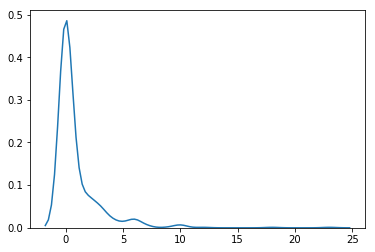

In [63]:
sns.kdeplot(overlap)
plt.show()

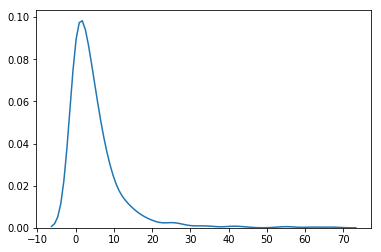

In [64]:
sns.kdeplot(desc_len)
plt.show()

In [65]:
datapd_train['ratio']=ratios
datapd_train.drop(['overlap_count','description_len', 'word_overlap'], axis=1, inplace=True)

#### Overlap between description and item_name (i.e intersection(description and item_name) / len(item_name))

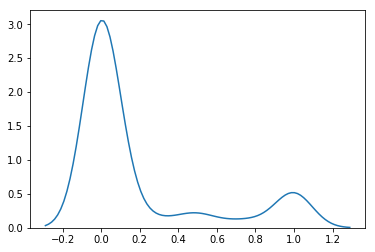

In [66]:
sns.kdeplot(datapd_train['ratio'].values)
plt.show()

In [67]:
useful_description_lengths=datapd_train[datapd_train['ratio']>0.3]['line_item_description'].str.split().apply(len)
datapd_train[datapd_train['ratio']>0.3]

,line_item_name,line_item_description,canonical_vendor_name,canonical_line_item_name,ratio
0,management services,april #### services,## minute ventures,management services,0.333333
41,iphone charger pack anker powerline lightning ...,iphone charger pack anker powerline lightning ...,amazon business,iphone charger pack anker powerline lightning ...,0.720000
58,,shipping and handling,amazon business,shipping and handling,1.000000
62,,super pumped the battle for uber,amazon business,super pumped the battle for uber,1.000000
65,usb charger,usb charger nekteck ##w type wall charger usb ...,amazon business,usb charger nekteck ##w type wall charger usb ...,0.920000
69,,xbox wireless controller white,amazon business,xbox wireless controller white,1.000000
76,blogging for verifly your certificate of insur...,### ### words at ###,person,### ### words,0.400000
77,blogging for verifly how to calculate the valu...,### ### words at ###,person,### ### words,0.400000
78,blogging for verifly so you think you can writ...,### ### words at ###,person,### ### words,0.400000
81,sub category page yoga insurance,### ### words at ###,person,### ### words,0.400000


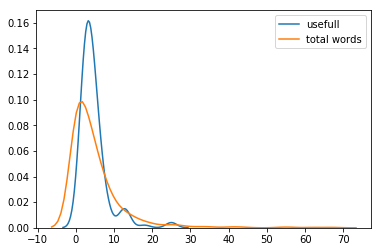

In [68]:
count = datapd_train['line_item_description'].str.split().apply(len)
sns.kdeplot(useful_description_lengths, label="usefull")
sns.kdeplot(count, label="total words")
plt.legend()
plt.show()

> from the above plot we can see that the descriptions < 11 words only having more overlap ration with the output string
__ So we are ignoring the descriptions that are more than 10 words __

In [69]:
def concat(x):
    x,y = x[0],x[1]
    if len(y.split())<11:
        return x.strip()+" "+y.strip()
    elif len(x)==0:
        return y.strip()
    else:
        return x.strip()
datapd_train['line_item_nd'] = datapd_train[['line_item_name','line_item_description']].apply(lambda x: concat(x),axis=1)

In [70]:
datapd_train.drop(['line_item_name','line_item_description', 'ratio'], axis=1, inplace=True)

In [71]:
datapd_train.head()

,canonical_vendor_name,canonical_line_item_name,line_item_nd
0,## minute ventures,management services,management services april #### services
1,acqcom digital marketing,web media fee,june web media fee ### ### times ## percent co...
3,adjust,business package,business package
4,adlift,seo services,seo services
5,adobe,creative cloud all apps,creative cloud all apps


#### Posing linking problem as binary classification

In [72]:
train=pd.merge(datapd_train, datap_items, on='canonical_vendor_name')
train.head()

,canonical_vendor_name,canonical_line_item_name_x,line_item_nd,canonical_line_item_name_y
0,## minute ventures,management services,management services april #### services,management services
1,acqcom digital marketing,web media fee,june web media fee ### ### times ## percent co...,web media fee
2,adjust,business package,business package,additional attributions
3,adjust,business package,business package,business package
4,adlift,seo services,seo services,content marketing


In [73]:
with_featres = extract_features(train, "line_item_nd", "canonical_line_item_name_y")

fuzzy features..


In [74]:
with_featres.head()

,canonical_vendor_name,canonical_line_item_name_x,line_item_nd,canonical_line_item_name_y,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,...,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,word_Common,word_Total,word_share
0,## minute ventures,management services,management services april #### services,management services,0.999950,0.499988,0.999950,0.499988,0.999950,0.399992,...,3.0,3.5,100,72,66,100,0.950000,2.0,6.0,1.0
1,acqcom digital marketing,web media fee,june web media fee ### ### times ## percent co...,web media fee,0.999967,0.333330,0.999967,0.333330,0.999967,0.299997,...,7.0,6.5,100,46,39,100,0.928571,3.0,12.0,1.0
2,adjust,business package,business package,additional attributions,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,2.0,26,26,26,29,0.111111,0.0,5.0,0.0
3,adjust,business package,business package,business package,0.999950,0.999950,0.999950,0.999950,0.999950,0.999950,...,0.0,2.0,100,100,100,100,0.941176,2.0,5.0,1.0
4,adlift,seo services,seo services,content marketing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,2.0,28,28,28,31,0.071429,0.0,5.0,0.0


In [75]:
X_train = with_featres.drop(['line_item_nd','canonical_vendor_name','canonical_line_item_name_y','canonical_line_item_name_x'], axis=1)

In [76]:
Y=(train.canonical_line_item_name_x==train.canonical_line_item_name_y).values
Y.dtype=np.int8
Y_train = Y

In [77]:
# X_train.to_csv('calculated_features.csv', index=False)

In [78]:
X_train.shape, Y_train.shape

((12089, 18), (12089,))

In [91]:
for i in range(1, 17, 2):
    clf = DecisionTreeClassifier(max_depth=i, class_weight='balanced')
    cross_val_check(clf, X_train, Y_train, i)

clf = DecisionTreeClassifier(max_depth=9, class_weight='balanced')
clf.fit(X_train, Y_train)
y_pred_train = clf.predict(X_train)
print("Confusion matrix \n", confusion_matrix(Y_train, y_pred_train))

1 F1 Score: 0.60 (+/- 0.58) [0.84132841 0.91935484 0.41102757 0.22985782]
1 AUC Score: 0.88 (+/- 0.17) [0.96487176 0.96883455 0.80506152 0.79610048]
3 F1 Score: 0.56 (+/- 0.51) [0.73517787 0.88030888 0.39386189 0.24169184]
3 AUC Score: 0.86 (+/- 0.18) [0.89226296 0.9701531  0.84320881 0.71845484]
5 F1 Score: 0.57 (+/- 0.58) [0.74166667 0.9382716  0.42888403 0.18604651]
5 AUC Score: 0.85 (+/- 0.22) [0.87648587 0.97590006 0.87528524 0.6791164 ]
7 F1 Score: 0.58 (+/- 0.51) [0.76785714 0.88627451 0.42159383 0.24909747]
7 AUC Score: 0.85 (+/- 0.18) [0.87359387 0.97269054 0.80388638 0.73489745]
9 F1 Score: 0.59 (+/- 0.47) [0.70638298 0.8968254  0.48366013 0.26482213]
9 AUC Score: 0.82 (+/- 0.19) [0.84995956 0.96572754 0.72861168 0.74077473]
11 F1 Score: 0.57 (+/- 0.48) [0.7255814  0.86530612 0.44025157 0.25503356]
11 AUC Score: 0.81 (+/- 0.16) [0.83114096 0.92372744 0.75707864 0.71706308]
13 F1 Score: 0.57 (+/- 0.37) [0.73933649 0.75630252 0.48550725 0.31436314]
13 AUC Score: 0.79 (+/- 0.15)

In [80]:
for i in range(Y_train.shape[0]):
    if y_pred_train[i]==0 and Y_train[i]==1:
        predictions = with_featres[['line_item_nd','canonical_vendor_name','canonical_line_item_name_y']].iloc[i].values
        print("text and desciption:", predictions[0])
        print("vendor: ",predictions[1])
        print("output: ",predictions[2])
        print("="*50)

text and desciption: cpt kw thimble_gl_nonbranded
vendor:  apple search ads
output:  apple search ads other
text and desciption: benjamin han
vendor:  athorus
output:  hourly services byh
text and desciption: mp preparation and filing of an international trademark application
vendor:  athorus
output:  hourly services byh
text and desciption: disbursements
vendor:  ct corporation
output:  obtain document misc plain copy of the annual report
text and desciption: included seats sum additional seats per month each 
vendor:  github
output:  github plan
text and desciption: general
vendor:  westmont associates
output:  hourly services cc
text and desciption: general conducted search of potential new name by state
vendor:  westmont associates
output:  hourly services cc
text and desciption: general new york cyber filing instructions
vendor:  westmont associates
output:  hourly services lm
text and desciption: general oconnor new york cyber filing requirements correspondence
vendor:  westmont 

In [81]:
# out of the 16 false negatives 10+ points are from "westmont associates" vendors
# may be using vendor name in the featurization might improve the model performance

In [82]:
for fea, imp  in zip(np.array(X_train.columns)[np.argsort(clf.feature_importances_)], np.sort(clf.feature_importances_)):
    print(fea, imp)

csc_max 0.0
last_word_eq 0.0
word_Common 0.0
csc_min 0.00018760662886923657
cwc_max 0.0007611731634244754
ctc_min 0.0008245773904684203
ctc_max 0.0014166536278123112
first_word_eq 0.006690567124495817
abs_len_diff 0.009503532837480842
word_share 0.01076461592026049
fuzz_partial_ratio 0.012878162552108639
token_sort_ratio 0.012957269071337835
mean_len 0.023359569426979688
word_Total 0.029584025993379986
fuzz_ratio 0.03033690691339752
token_set_ratio 0.03195996417905856
cwc_min 0.03637074853915418
longest_substr_ratio 0.7924046266317718


# Deep Leanring model: 1

In [83]:
X_train_d = train[['line_item_nd','canonical_vendor_name','canonical_line_item_name_y']]
# here d at the last is just to represent the data for deep learning models
Y_train_d = Y_train

In [84]:
print(X_train_d.shape, Y_train_d.shape, X_train.shape)
X_train_d.head()

(12089, 3) (12089,) (12089, 18)


,line_item_nd,canonical_vendor_name,canonical_line_item_name_y
0,management services april #### services,## minute ventures,management services
1,june web media fee ### ### times ## percent co...,acqcom digital marketing,web media fee
2,business package,adjust,additional attributions
3,business package,adjust,business package
4,seo services,adlift,content marketing


In [85]:
# as we know there are 132 unique vendor
# i am considering that feature as categorical feature
# and the if we observe the names of the vendors, each name is having more than one word, to make it easy for processing
# replace the space with '_'

In [86]:
X_train_d['Y']=Y_train_d
X_train_d.to_csv('deep_learning_features.csv', index=False)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# will be experimenting different DL models in "linking.ipynb" and "seq-seq_models.ipynb"
# the final predictions was are computed in "inference.ipynb"